This is a script analysing the forecast (target) times of forecasts for each lead time.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
data_path = "./"

In [2]:
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")

/Users/clifflau/opt/anaconda3/lib/python3.8/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [3]:
lat = np.array(vis_forecast_obs['latitude'])
lon = np.array(vis_forecast_obs['longitude'])
alt = np.array(vis_forecast_obs['altitude'])
base= np.array(vis_forecast_obs['forecast_reference_time'])
lead = np.array(vis_forecast_obs['forecast_period'])
lead_hr = np.array(lead*10**-9/3600, dtype='int')
vis_forecast_obs_array = np.array(vis_forecast_obs)

In [5]:
base_df = np.tile(base, len(lat)*len(lead_hr))
lead_df = np.repeat(lead, len(base)*len(lat))
lead_hr_df = np.repeat(lead_hr, len(base)*len(lat))
forecast_time_df = base_df + lead_df
vis_forecast_obs_df = vis_forecast_obs_array.flatten()

In [7]:
df = pd.DataFrame({'base': base_df,
                   'lead': lead_df,
                   'lead_hr': lead_hr_df,
                   'forecast_time': forecast_time_df,
                   'vis_obs': vis_forecast_obs_df})

In [8]:
target_hour_set = []
for i in np.arange(6,121,6):
    target_dt = df[df['lead_hr']==i]['forecast_time']
    target_hour = []
    for j in target_dt:
        target_hour.append(j.hour)
    target_hour_set.append(list(set(target_hour)))
target_hour_set = np.array(target_hour_set).flatten()
target_hour_set

Text(0, 0.5, 'Forecast time (hour in day)')

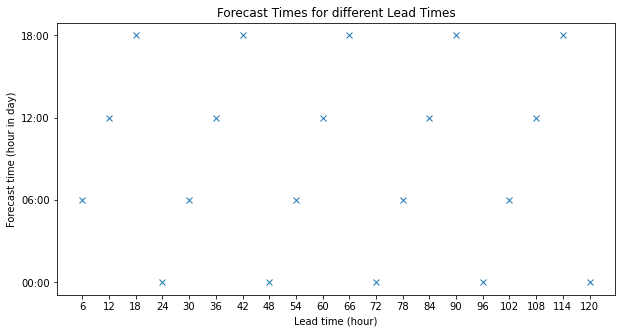

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(6,121,6), target_hour_set, 'x')
ax.set_yticks([0,6,12,18])
ax.set_yticklabels(['00:00','06:00','12:00','18:00'])
ax.set_xticks(np.arange(6,121,6))
ax.set_title("Forecast Times for different Lead Times")
ax.set_xlabel("Lead time (hour)")
ax.set_ylabel("Forecast time (hour in day)")